# Traffic Sign Recognition -- Image Recognition with CNN
## CalTech AIML Bootcamp -- Deep Learning with Keras & Tensorflow
### Weston Mauz
#### February 2, 2023

### Import required libraries

In [119]:
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import AvgPool2D
from keras.layers import BatchNormalization
from keras.layers import Reshape
from tensorflow.keras import layers

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

import pandas as pd
import numpy as np

### Read Data Labels

In [120]:
data_labels = pd.read_excel('Train_data_label.xlsx')

In [121]:
data_labels

,ClassId,Path
0,20,Train/20/00020_00000_00000.png
1,20,Train/20/00020_00000_00001.png
2,20,Train/20/00020_00000_00002.png
3,20,Train/20/00020_00000_00003.png
4,20,Train/20/00020_00000_00004.png
...,...,...
39204,42,Train/42/00042_00007_00025.png
39205,42,Train/42/00042_00007_00026.png
39206,42,Train/42/00042_00007_00027.png
39207,42,Train/42/00042_00007_00028.png


### Split Data into train and validation

- Read data in and resize to 30x30

Note:

- Converted to grayscale in the model

In [122]:
train_data = tf.keras.utils.image_dataset_from_directory(directory='Train', validation_split=0.2, subset="training", seed=42, image_size=(30,30))

Found 39209 files belonging to 43 classes.
Using 31368 files for training.


In [123]:
val_data = tf.keras.utils.image_dataset_from_directory(directory='Train', validation_split=0.2, subset="validation", seed=42, image_size=(30,30))

Found 39209 files belonging to 43 classes.
Using 7841 files for validation.


In [124]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 30, 30, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [125]:
class_names = train_data.class_names

In [126]:
class_names

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '4',
 '40',
 '41',
 '42',
 '5',
 '6',
 '7',
 '8',
 '9']

### Set up notebook to visualize data

In [127]:
import matplotlib.pyplot as plt

### Visualize training data in notebook

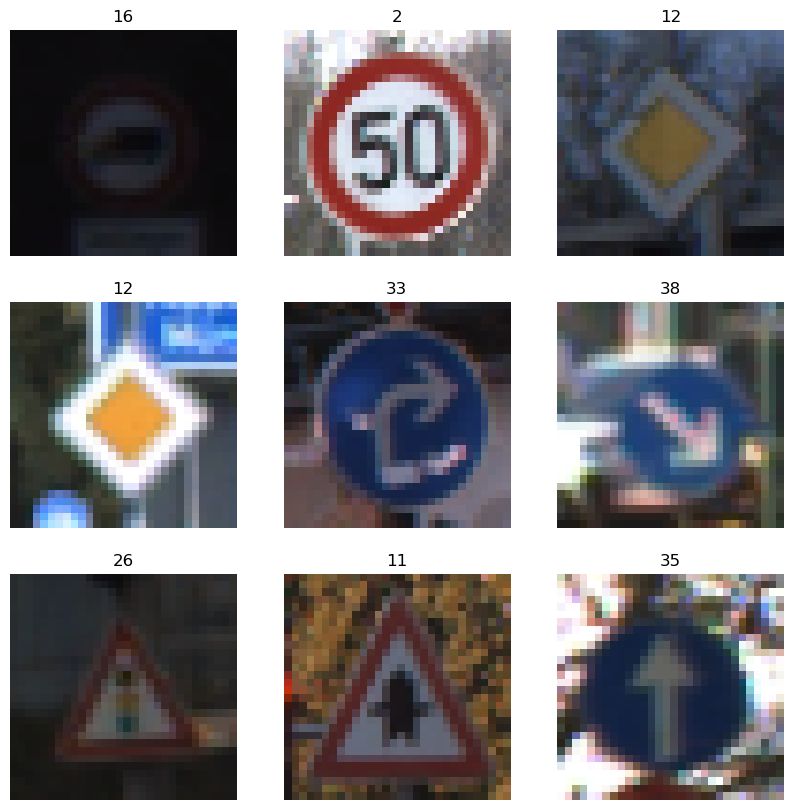

In [128]:
plt.figure(figsize=(10,10))
for images,labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [129]:
AUTOTUNE = tf.data.AUTOTUNE

## Grayscale Model

### Build model structure

Add following layers from problem statement:

- Convolutional
- Maxpool
- Dropout

Activation function

- Relu

In [134]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(30, 30, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(rate=0.2),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(rate=0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compile Model

Loss function

- cross-entropy

Optimizer:

- Adam

In [135]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [136]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_12 (Rescaling)    (None, 30, 30, 3)         0         
                                                                 
 conv2d_24 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 15, 15, 16)       0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 15, 15, 16)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 15, 15, 32)        4640      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                 

### Fit / Train Model

Callbacks:

- Early Stop

Epochs: 

- 5

In [138]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)

In [139]:
epochs=5
history = model.fit(
  train_data,
  validation_data=val_data,
  epochs=epochs
)

Epoch 1/5
981/981 [==============================] - 11s 11ms/step - loss: 0.1422 - accuracy: 0.9548 - val_loss: 0.0741 - val_accuracy: 0.9825
Epoch 2/5
981/981 [==============================] - 11s 11ms/step - loss: 0.1203 - accuracy: 0.9615 - val_loss: 0.0500 - val_accuracy: 0.9872
Epoch 3/5
981/981 [==============================] - 12s 12ms/step - loss: 0.1029 - accuracy: 0.9663 - val_loss: 0.0503 - val_accuracy: 0.9860
Epoch 4/5
981/981 [==============================] - 13s 13ms/step - loss: 0.0897 - accuracy: 0.9714 - val_loss: 0.0464 - val_accuracy: 0.9874
Epoch 5/5
981/981 [==============================] - 12s 12ms/step - loss: 0.0806 - accuracy: 0.9738 - val_loss: 0.0440 - val_accuracy: 0.9871


### Plot Accuracy for Grayscale Model

Accuracy

- 98.7%

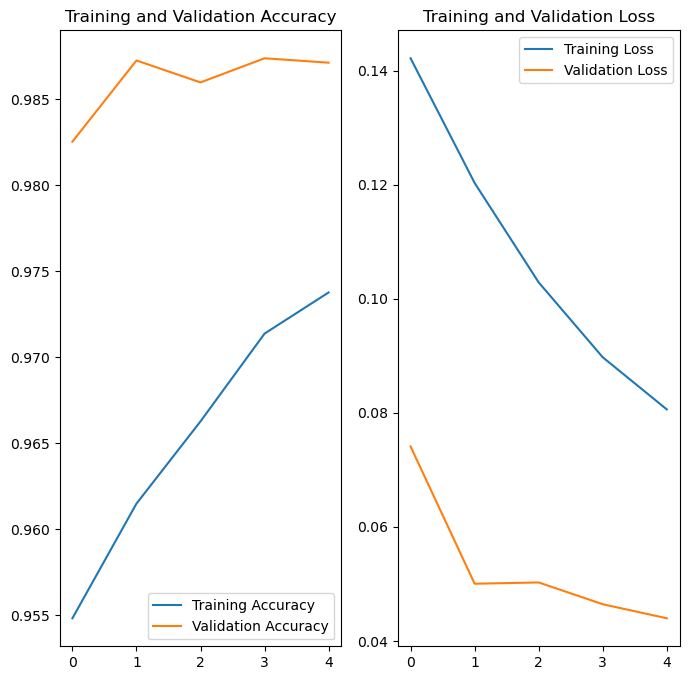

In [140]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Color Model

In [150]:
model2 = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(rate=0.2),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(rate=0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [151]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [156]:
model2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 15, 15, 16)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 15, 15, 16)        0         
                                                                 
 conv2d_34 (Conv2D)          (None, 15, 15, 32)        4640      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 7, 7, 32)        

In [153]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)

In [154]:
epochs=5
history2 = model2.fit(
  train_data,
  validation_data=val_data,
  epochs=epochs
)

Epoch 1/5
981/981 [==============================] - 12s 12ms/step - loss: 2.7941 - accuracy: 0.3641 - val_loss: 1.0362 - val_accuracy: 0.7105
Epoch 2/5
981/981 [==============================] - 11s 11ms/step - loss: 0.9331 - accuracy: 0.7137 - val_loss: 0.4040 - val_accuracy: 0.8799
Epoch 3/5
981/981 [==============================] - 11s 11ms/step - loss: 0.5562 - accuracy: 0.8290 - val_loss: 0.2795 - val_accuracy: 0.9223
Epoch 4/5
981/981 [==============================] - 11s 11ms/step - loss: 0.4098 - accuracy: 0.8736 - val_loss: 0.1657 - val_accuracy: 0.9485
Epoch 5/5
981/981 [==============================] - 11s 11ms/step - loss: 0.3389 - accuracy: 0.8979 - val_loss: 0.1901 - val_accuracy: 0.9500


### Plotting Accuracy of Color Model

Accuracy

- 95%

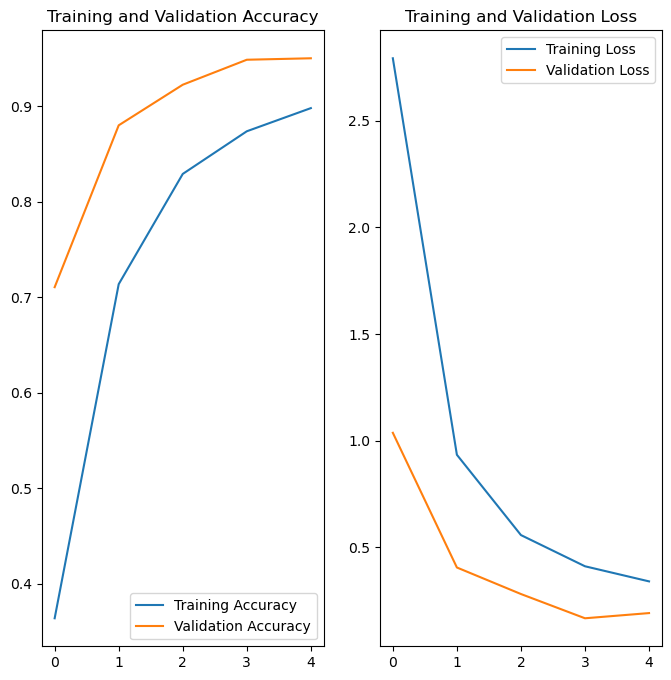

In [155]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()